In [ ]:
#!pip install PyPDF2
#!pip install nltk

In [1]:
import PyPDF2
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk import pos_tag
import matplotlib.pyplot as plt

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\François\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\François\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\François\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
# Ouvrir le fichier PDF en mode lecture binaire
with open('./PDF/OPCO2i_OBS_Impact-TE-metiers-competences_Rapport-final.pdf', 'rb') as file:
    # Créer un objet PDFReader
    pdf_reader = PyPDF2.PdfReader(file)

    # Initialiser une chaîne de caractères pour stocker le texte extrait
    text = ""

    # Parcourir toutes les pages du PDF
    for page_num in range(len(pdf_reader.pages)):
        # Extraire le texte de chaque page et l'ajouter à la chaîne
        text += pdf_reader.pages[page_num].extract_text()

In [14]:
# Tokenisation des mots
tokens = word_tokenize(text, language="french")

In [15]:
# Liste des mots vides à supprimer
stop_words = set(stopwords.words('french'))

# Préparation
tagged_tokens = pos_tag(tokens)
nouns = [word.lower() for word, pos in tagged_tokens if pos.startswith('NN')]

# Filtrer les mots vides et la ponctuation et conserver seulement les noms communs
filtered_tokens = [word.lower() for word in nouns if word.lower() not in stop_words and word.isalpha()]

In [16]:
# Calcul de la fréquence des mots
fdist = FreqDist(filtered_tokens)

In [17]:
# Nombre de mots les plus fréquents à afficher
num_top_words = 100

# Affichage des mots les plus fréquents
top_words = fdist.most_common(num_top_words)
for word, freq in top_words:
    print(f"Mot : {word}, Fréquence : {freq}")

Mot : transition, Fréquence : 718
Mot : écologique, Fréquence : 581
Mot : métiers, Fréquence : 404
Mot : compétences, Fréquence : 365
Mot : impact, Fréquence : 298
Mot : énergie, Fréquence : 149
Mot : consommation, Fréquence : 147
Mot : production, Fréquence : 140
Mot : entreprises, Fréquence : 119
Mot : déchets, Fréquence : 116
Mot : branches, Fréquence : 110
Mot : process, Fréquence : 108
Mot : actions, Fréquence : 105
Mot : premières, Fréquence : 101
Mot : matières, Fréquence : 100
Mot : émissions, Fréquence : 97
Mot : formation, Fréquence : 96
Mot : industrie, Fréquence : 90
Mot : énergétique, Fréquence : 89
Mot : formations, Fréquence : 88
Mot : être, Fréquence : 88
Mot : entreprise, Fréquence : 88
Mot : sources, Fréquence : 84
Mot : gestion, Fréquence : 82
Mot : ges, Fréquence : 79
Mot : techniques, Fréquence : 77
Mot : enjeux, Fréquence : 76
Mot : réduire, Fréquence : 73
Mot : lien, Fréquence : 72
Mot : produits, Fréquence : 72
Mot : eau, Fréquence : 72
Mot : certifications, Fré

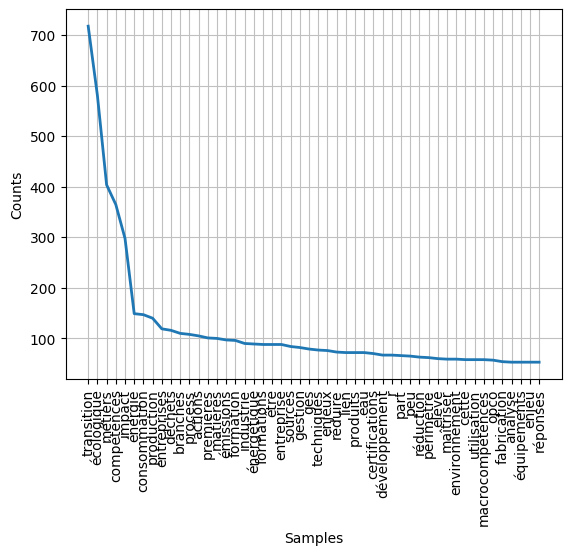

In [8]:
# Tracer le graphique de la distribution de fréquence
fdist.plot(num_top_words, cumulative=False)
plt.show()